In [1]:
import bw2data, bw2calc, bw2io
from edges import EdgeLCIA, get_available_methods
from bw2analyzer.contribution import ContributionAnalysis
bw2data.projects.set_current("ecoinvent-3.10.1-cutoff")
#act = bw2data.Database("ecoinvent-3.10.1-cutoff").random()
act = [a for a in bw2data.Database("ecoinvent-3.10.1-cutoff") if a["name"] == "electricity, high voltage, import from AL" and a["location"] == "XK"][0]
act

'electricity, high voltage, import from AL' (kilowatt hour, XK, None)

In [2]:
#method = ('GeoPolRisk', '2024')
method = ('AWARE 2.0', 'Country', 'all', 'yearly')
LCA = EdgeLCIA(
    demand={act: 1},
    method=method,
    use_distributions=True,
    iterations=1000
)

In [3]:
LCA.lci()
LCA.map_exchanges()
#LCA.map_aggregate_locations()
#LCA.map_dynamic_locations()
#LCA.map_remaining_locations_to_global()

#LCA.evaluate_cfs()
#LCA.lcia()

/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 4.83e+13)
  warnings.warn(msg, UmfpackWarning)


Identifying eligible exchanges...


100%|████████████████████████████████████| 8964/8964 [00:00<00:00, 23311.82it/s]


In [4]:
LCA.evaluate_cfs()

In [5]:
LCA.lcia()

In [6]:
LCA.score

Format,coo
Data Type,float64
Shape,"(1000,)"
nnz,1000
Density,1.0
Read-only,True
Size,15.6K
Storage ratio,2.00


In [7]:
LCA.score.data

array([ 4.69931352e-01, -9.17300753e-01, -1.63792746e+00, -5.02685835e-01,
       -1.82398034e-01,  3.68299612e-01,  1.25903192e+00, -2.19419421e+00,
       -1.04120432e+00,  2.27096635e-01,  2.64908303e+00,  2.89561839e-01,
       -2.87177975e+00,  1.21832615e+00, -4.36640513e-01, -4.88777067e+00,
       -1.46279543e+00, -1.90099321e+00, -1.37281238e+00,  1.65285009e+00,
        1.64584197e+00,  7.29338186e-01,  2.21144989e+00, -6.44073403e-01,
        2.80189108e-01,  1.11036236e-02,  7.08131374e-02,  2.54728631e-01,
        1.05429451e+00, -6.52713655e-01, -1.56822525e+00, -3.25586877e-01,
       -2.65616920e+00,  1.68476604e+00, -3.27623091e+00,  9.95496759e-02,
       -4.19110782e-01,  7.50960971e-02,  4.82201389e-01,  1.10470544e+00,
       -3.21966979e+00, -3.02987368e+00, -2.14975523e-01,  3.83525573e+00,
       -1.14669356e+00, -3.26243448e+00, -4.55101812e-03,  6.18973231e+00,
       -1.65178970e+00, -1.00464269e+00, -1.96466698e+00,  4.38789781e+00,
        1.89435604e+00, -

In [8]:
df = LCA.generate_cf_table()

In [9]:
df

,supplier name,supplier categories,consumer name,consumer reference product,consumer location,amount,CF (mean),CF (std),CF (min),CF (5%),CF (25%),CF (50%),CF (75%),CF (95%),CF (max),impact (mean),impact (std),impact (min),impact (max)
0,"Water, cooling, unspecified natural origin","(natural resource, in water)","heat and power co-generation, lignite","electricity, high voltage",SI,7.632067e-06,2.081980,0.366245,1.100000,1.920000,1.920000,1.920000,2.270000,2.270000,4.430000,1.588981e-05,2.795207e-06,8.395274e-06,3.381006e-05
1,"Water, cooling, unspecified natural origin","(natural resource, in water)","phosphoric acid production, dihydrate process","phosphoric acid, fertiliser grade, without wat...",MA,1.105725e-09,96.819144,3.282574,72.378099,90.137286,95.475793,97.831540,99.192002,99.850145,99.995674,1.070553e-07,3.629622e-09,8.003025e-08,1.105677e-07
2,"Water, cooling, unspecified natural origin","(natural resource, in water)","electricity production, natural gas, combined ...","electricity, high voltage",MT,1.911869e-08,9.877210,20.078164,4.130000,4.130000,4.570000,4.570000,4.570000,84.800000,84.800000,1.888393e-07,3.838682e-07,7.896020e-08,1.621265e-06
3,"Water, cooling, unspecified natural origin","(natural resource, in water)","treatment of blast furnace gas, in power plant","electricity, high voltage",BE,5.582782e-09,3.518650,2.570322,1.400000,1.400000,1.400000,4.090000,4.090000,4.090000,20.700000,1.964385e-08,1.434955e-08,7.815894e-09,1.155636e-07
4,"Water, cooling, unspecified natural origin","(natural resource, in water)","electricity production, natural gas, combined ...","electricity, high voltage",IN-DL,1.425384e-08,29.401200,6.964481,19.500000,19.500000,19.500000,34.300000,34.300000,34.300000,34.300000,4.190800e-07,9.927060e-08,2.779499e-07,4.889067e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Water,"(water, surface water)","sawing, softwood",bark,CA-QC,4.113519e-14,-0.998053,0.081858,-1.139899,-1.126209,-1.066069,-1.003877,-0.926563,-0.867833,-0.852018,-4.105512e-14,3.367259e-15,-4.688996e-14,-3.504793e-14
3849,Water,"(water, surface water)","kerosene production, petroleum refinery operation",kerosene,BR,4.410940e-12,-17.692249,9.908000,-35.475073,-33.830806,-26.128909,-17.377731,-9.450456,-2.276302,-0.132124,-7.803945e-11,4.370360e-11,-1.564784e-10,-5.827908e-13
3850,Water,"(water, surface water)",treatment of residue from mechanical treatment...,"residue from mechanical treatment, IT accessory",CH,4.001121e-20,-1.374524,0.105677,-2.090000,-1.400000,-1.400000,-1.400000,-1.400000,-0.992000,-0.992000,-5.499637e-20,4.228249e-21,-8.362344e-20,-3.969113e-20
3851,Water,"(water, surface water)","petroleum and gas production, onshore","natural gas, high pressure",VE,5.663925e-11,-16.251102,27.123495,-100.000000,-100.000000,-17.104765,-3.944934,-1.088822,-0.452645,-0.367035,-9.204502e-10,1.536254e-09,-5.663925e-09,-2.078857e-11


In [9]:
df.to_excel("df.xlsx")

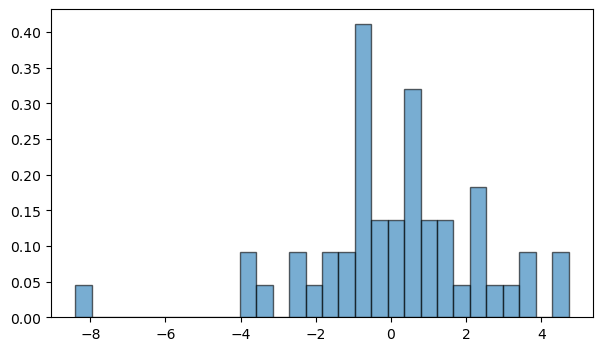

In [5]:
import matplotlib.pyplot as plt
# Prepare plot
plt.figure(figsize=(7, 4))

# Plot histogram with density=True
counts, bins, _ = plt.hist(
    results,
    bins=30,
    edgecolor='black',
    alpha=0.6,
    density=True,
    label="Sampled histogram (normalized)"
)

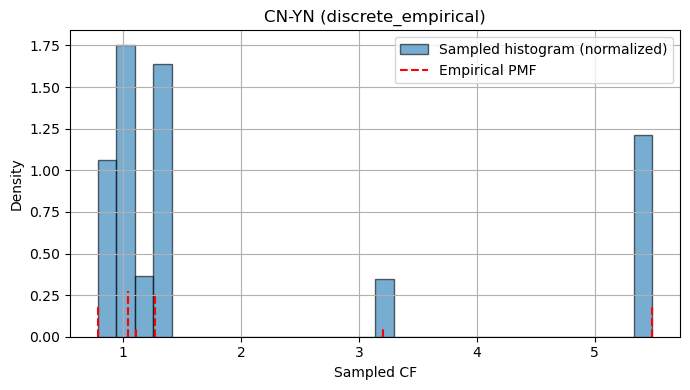

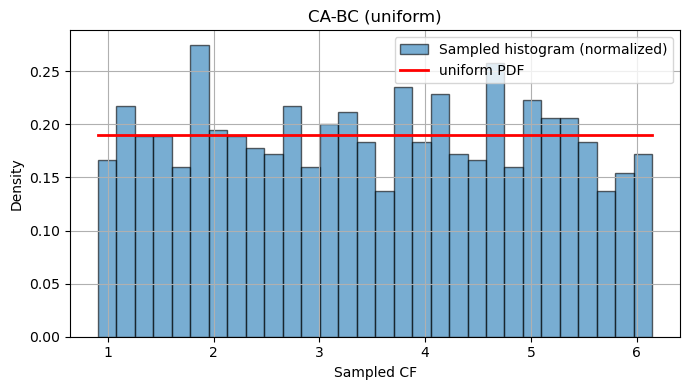

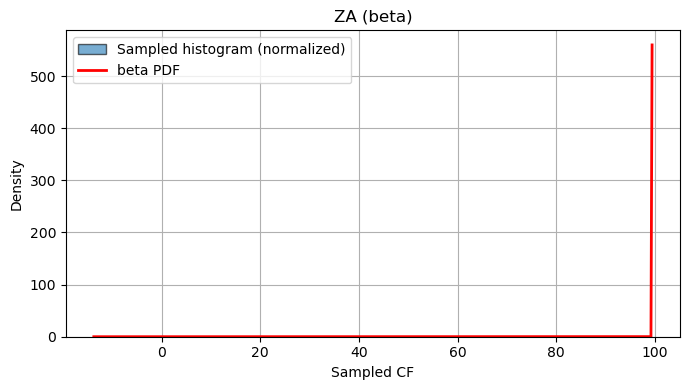

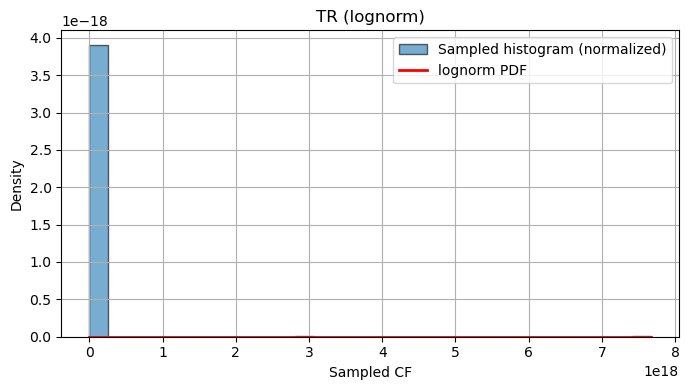

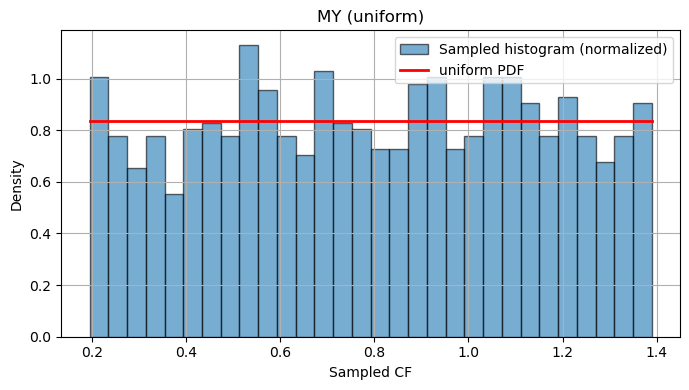

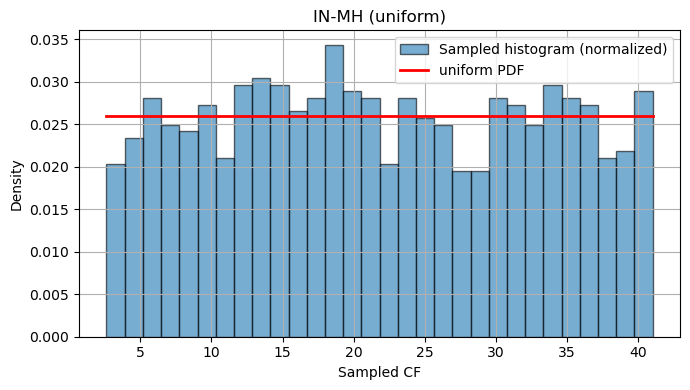

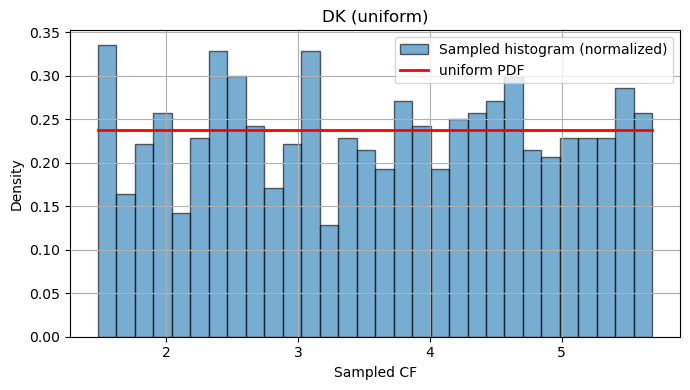

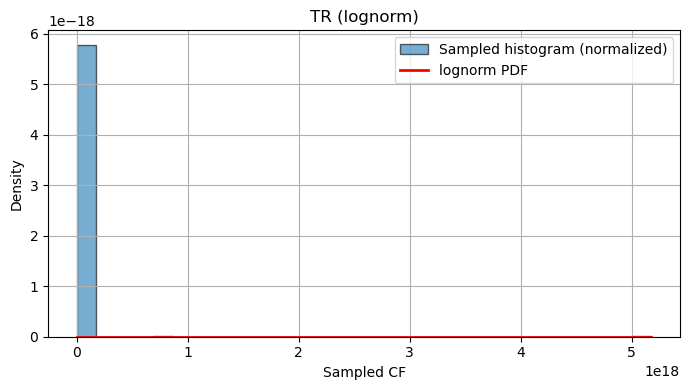

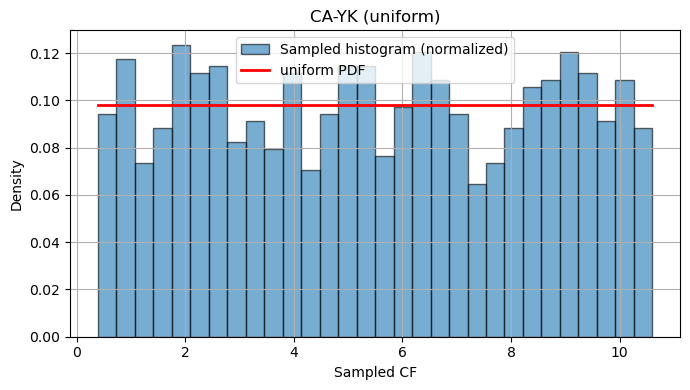

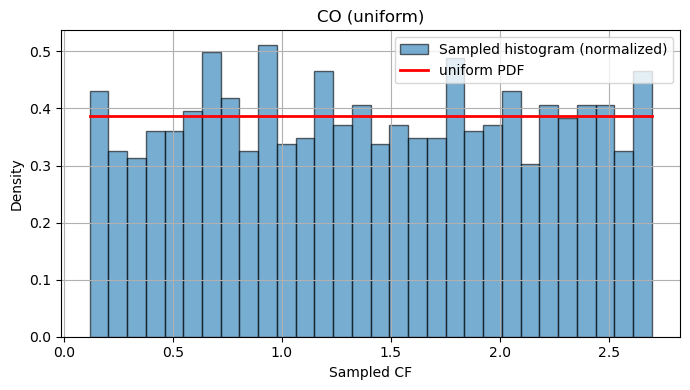

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

def test_random_sampling(n=5, num_samples=1000):
    eligible_cfs = [cf for cf in LCA.cfs_mapping if "uncertainty" in cf]
    if not eligible_cfs:
        print("No CFs with uncertainty found.")
        return

    selected_cfs = random.sample(eligible_cfs, min(n, len(eligible_cfs)))

    for i, cf in enumerate(selected_cfs):
        unc = cf["uncertainty"]
        dist_name = unc["distribution"]
        params = unc["parameters"]
        location = cf['consumer'].get('location', 'unknown')

        samples = [LCA.generate_random_CF(cf) for _ in range(num_samples)]
        samples = np.array(samples)

        # Prepare plot
        plt.figure(figsize=(7, 4))

        # Plot histogram with density=True
        counts, bins, _ = plt.hist(
            samples,
            bins=30,
            edgecolor='black',
            alpha=0.6,
            density=True,
            label="Sampled histogram (normalized)"
        )

        x = np.linspace(samples.min(), samples.max(), 500)
        pdf = None

        try:
            if dist_name == "norm":
                pdf = stats.norm.pdf(x, loc=params["loc"], scale=params["scale"])
            elif dist_name == "lognorm":
                pdf = stats.lognorm.pdf(x, s=params["shape_a"], loc=params["loc"], scale=params["scale"])
            elif dist_name == "gamma":
                pdf = stats.gamma.pdf(x, a=params["shape_a"], loc=params["loc"], scale=params["scale"])
            elif dist_name == "weibull_min":
                pdf = stats.weibull_min.pdf(x, c=params["shape_a"], loc=params["loc"], scale=params["scale"])
            elif dist_name == "triang":
                c = (params["loc"] - params["minimum"]) / (params["maximum"] - params["minimum"])
                pdf = stats.triang.pdf(x, c=c, loc=params["minimum"], scale=params["maximum"] - params["minimum"])
            elif dist_name == "beta":
                a = params["shape_a"]
                b = params["shape_b"]
                pdf = stats.beta.pdf(x, a=a, b=b, loc=params["loc"], scale=params["scale"])
            elif dist_name == "uniform":
                pdf = stats.uniform.pdf(x, loc=params["minimum"], scale=params["maximum"] - params["minimum"])
            elif dist_name == "discrete_empirical":
                values = np.array(params["values"])
                probs = np.array(params["weights"])
                probs /= probs.sum()
                plt.vlines(values, 0, probs, color='red', linestyle='--', label="Empirical PMF")
        except Exception as e:
            print(f"⚠️ Failed to compute PDF for {dist_name}: {e}")

        if pdf is not None:
            plt.plot(x, pdf, 'r-', lw=2, label=f"{dist_name} PDF")

        plt.title(f"{location} ({dist_name})")
        plt.xlabel("Sampled CF")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

test_random_sampling(n=10)

In [3]:
LCA.statistics()

+----------------------+-------------------------------------------+
|       Activity       | electricity, high voltage, import from AL |
|     Method name      | ('AWARE 2.0', 'Country', 'all', 'yearly') |
|      Data file       |        AWARE 2.0_Country_all_yearly       |
| Unique CFs in method |                    504                    |
|   Unique CFs used    |                    504                    |
|  Exc. characterized  |                    8877                   |
| Exc. uncharacterized |                   327032                  |
+----------------------+-------------------------------------------+


In [4]:
df = LCA.generate_cf_table()

In [6]:
LCA.generate_cf_table().to_excel("df.xlsx")

In [12]:
df.groupby(["consumer location", "CF"])["CF"].mean()

consumer location  CF    
AE                 -17.40   -17.40
                    17.40    17.40
AR                 -41.50   -41.50
                   -6.23     -6.23
                    6.23      6.23
                             ...  
ZA                 -68.50   -68.50
                   -49.80   -49.80
                    49.80    49.80
ZM                 -4.74     -4.74
                    4.74      4.74
Name: CF, Length: 605, dtype: float64

In [3]:
import math
h=100
(3.83e-13 * 121 * (1 - math.exp(-h / 121))) / (9.17e-14 * h)

2.842227613327586

In [3]:
LCA.statistics()

+----------------------+-------------------------------------------+
|       Activity       | electricity, high voltage, import from AL |
|     Method name      |  ('AWARE 1.2c', 'Country', 'non', 'irri', |
|                      |                 'yearly')                 |
|      Data file       |                lcia_sample4               |
| Unique CFs in method |                     3                     |
|   Unique CFs used    |                     3                     |
|  Exc. characterized  |                   12788                   |
| Exc. uncharacterized |                     0                     |
+----------------------+-------------------------------------------+


In [4]:
df = LCA.generate_cf_table()
#df["supplier name"].unique()

Matrix type: biosphere
